In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.isnull()  # Write the code for checking missing values here
# or df.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
# Handle missing values
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] =  df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
df.duplicated().sum() # Check for duplicate records

np.int64(0)

In [ ]:
df['species'].value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


In [ ]:
df['sex'].value_counts()

,count
sex,
MALE,168
FEMALE,165


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()

le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [ ]:
# Feature Encoding
df = pd.get_dummies(
    df,
    columns=['sex','island'], # For one hot Encoding
    drop_first=True
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['bill_length_mm', 'bill_depth_mm']] =  scaler.fit_transform(
    df[['bill_length_mm', 'bill_depth_mm']]
)

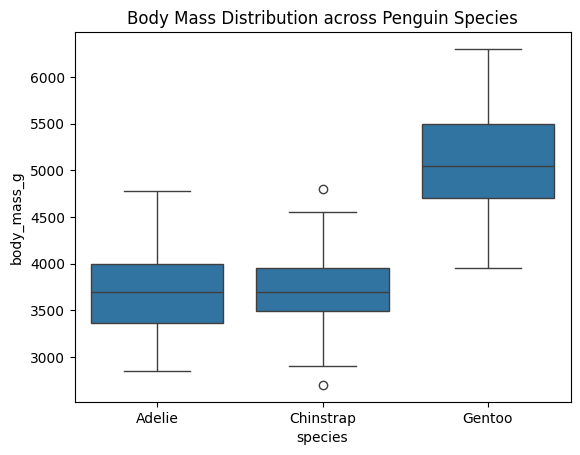

In [ ]:
# Do different penguin species have different body masses?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title("Body Mass Distribution across Penguin Species")
plt.show()

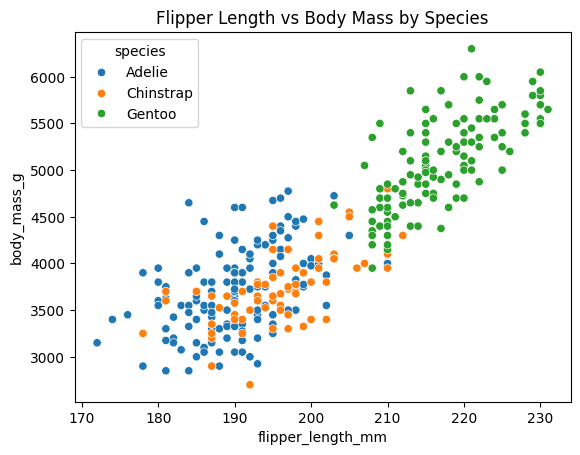

In [ ]:
# How are flipper length and body mass related across species?
sns.scatterplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species'
)
plt.title("Flipper Length vs Body Mass by Species")
plt.show()

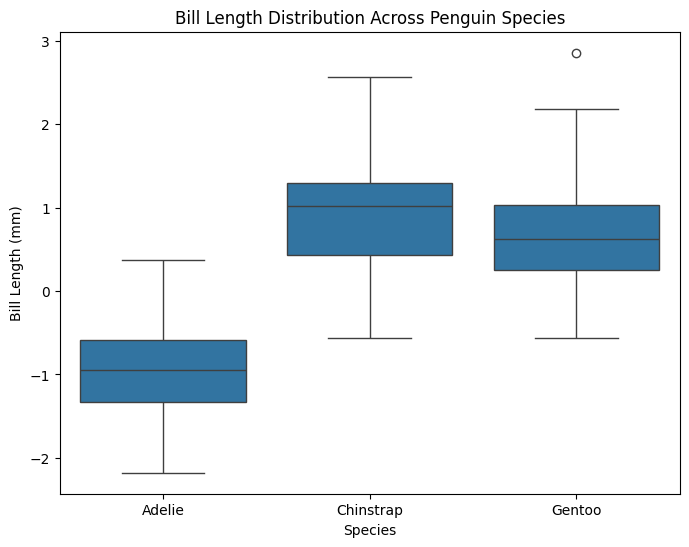

In [ ]:
# Do different penguin species have different bill lengths?
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title("Bill Length Distribution Across Penguin Species")
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.show()

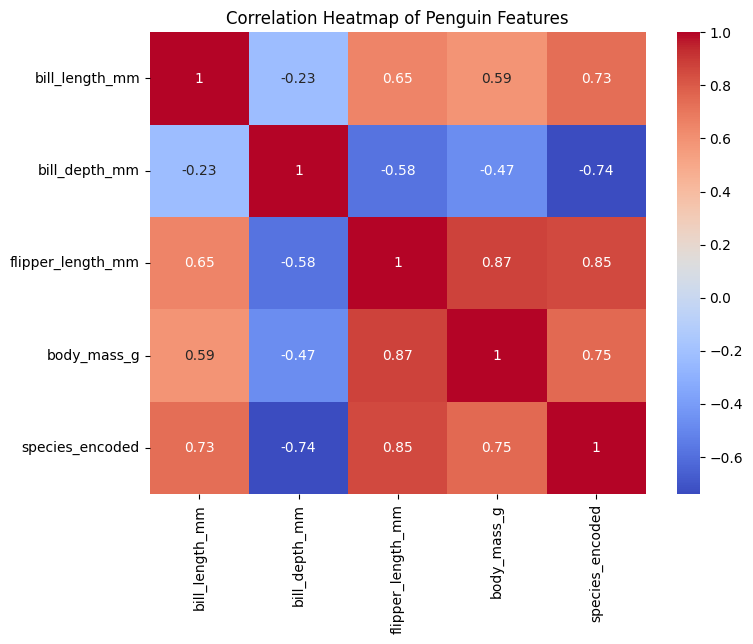

In [ ]:
# Which numerical features are strongly correlated?
plt.figure(figsize=(8,6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap of Penguin Features")
plt.show()

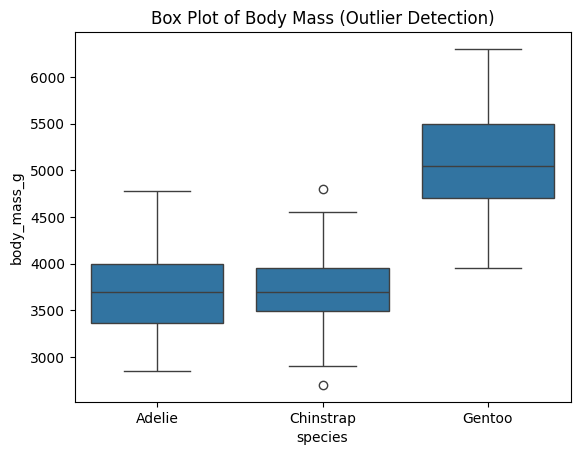

In [ ]:
# Box Plot - Used for ouliers
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title("Box Plot of Body Mass (Outlier Detection)")
plt.show()